In [109]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd


In [110]:
mvcnn = (
	pd.concat([
		pd.read_csv('./results/mvcnn_stage_2/logs.csv')
			.assign(epoch=lambda x: x.epoch.astype(int) + 5),
		pd.read_csv('./results/mvcnn_stage_1/logs.csv')
	])
	.sort_values('epoch')
	[['epoch', 'train_acc', 'acc']]
	.rename({
		'train_acc':'mvcnn',
		'acc':'val_mvcnn'
	})
)
mvcnn.columns = ['epoch', 'mvcnn', 'val_mvcnn']
# ----------------------------------------------------------------------------------------
original = (
	pd.read_csv('./results/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
original.columns = ['epoch', 'capsnet', 'val_original_capsnet']
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = (
	pd.read_csv('./results/experiment_mv/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'view_pooling_accuracy', 'val_view_pooling_accuracy']]
)
mv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = pd.concat([sv_capsnet, mv_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns =['epoch', 'mv_cap_capsnet1', 'val_mv_cap_capsnet1']
mv_cap_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet1', 'val_mv_cap_capsnet1']
mv_cap_capsnet1 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns =['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet2 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(original, on='epoch')
	.merge(mv_capsnet, on='epoch')
	.merge(mv_cap_capsnet1, on='epoch')
	.merge(mv_cap_capsnet2, on='epoch')
	.assign(epoch=lambda x: x.epoch.astype(int))
)

trained = metrics.filter(regex=r'^(?!val.*)|epoch')
validated = metrics.filter(regex=r'^(val.*|epoch)')


In [114]:

print(validated.to_latex(
	header=[
		'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
	],
	index=False
))
print(trained.to_latex(
	header=[
		'epocha', 'mvcnn', 'capsnet', 'mv-capsnet', 'mv-cap-capsnet1', 'mv-cap-capsnet2'
	],
	index=False
))


\begin{tabular}{rrrrrr}
\toprule
epocha &     mvcnn &   capsnet & mv-capsnet & mv-cap-capsnet1 & mv-cap-capsnet2 \\
\midrule
     0 &  0.791531 &  0.302292 &   0.718333 &        0.479573 &        0.479573 \\
     1 &  0.835160 &  0.561875 &   0.768125 &        0.629025 &        0.629025 \\
     2 &  0.849466 &  0.630833 &   0.777917 &        0.687466 &        0.687466 \\
     3 &  0.857515 &  0.663125 &   0.783958 &        0.714421 &        0.714421 \\
     4 &  0.859916 &  0.683125 &   0.800417 &        0.721354 &        0.721354 \\
     5 &  0.888393 &  0.674167 &   0.800000 &        0.831981 &        0.831981 \\
     6 &  0.880276 &  0.698333 &   0.822500 &        0.848214 &        0.848214 \\
     7 &  0.881088 &  0.701250 &   0.827500 &        0.838068 &        0.838068 \\
     8 &  0.896104 &  0.722917 &   0.807500 &        0.840503 &        0.840503 \\
     9 &  0.900974 &  0.710417 &   0.852500 &        0.827516 &        0.827516 \\
\bottomrule
\end{tabular}

\begin{tabular}{rr

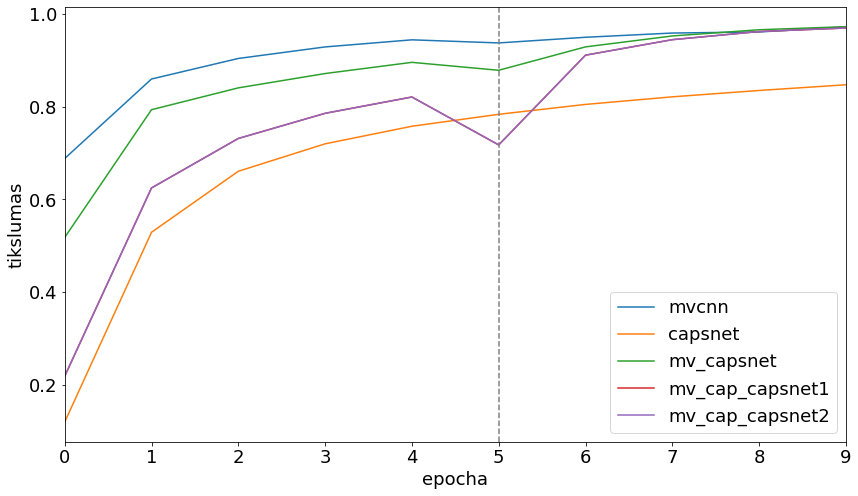

In [120]:
ax = trained.plot(x='epoch', y=trained.columns[1:], figsize=(14, 8), fontsize=18)
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('tikslumas', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=5, color='grey', linestyle='--')
plt.savefig('trained.png')

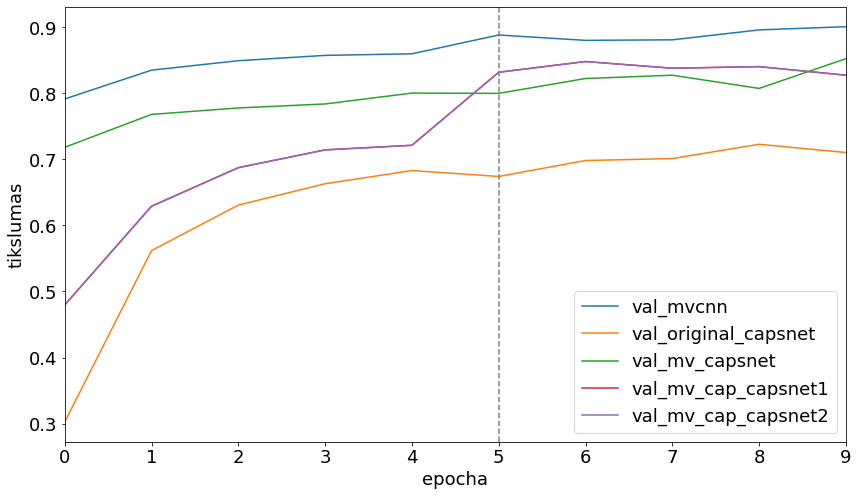

In [121]:
ax = validated.plot(x='epoch', y=validated.columns[1:], figsize=(14, 8), fontsize=18)
ax.set_xlabel('epocha', fontsize=18)
ax.set_ylabel('tikslumas', fontsize=18)
ax.legend(fontsize=18)
ax.axvline(x=5, color='grey', linestyle='--')
plt.savefig('validated.png')